### Tutorial for creating Example animation 2 with FieldVis

Author: Nathanyel Schut<br>
Date: 12-06-2022

In [1]:
from fieldvis import et_reader, field_dp, field_plot
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

import dill
dill.settings['recurse'] = True

Paths to data, adjust these to where they are stored on your computer

In [2]:
data_path = r"C:\Users\lolha\Documents\Bachelor_project\data"
save_path = r"C:\Users\lolha\Documents\Bachelor_project\Example Animation 3"

Getting lists of the full filenames

In [3]:
# it_list, files_B = field_dp.find_iterations('Bvec', data_path, return_files=True)
it_list, files_rho = field_dp.find_iterations('rho', data_path, return_files=True)

# print(et_reader.ET_file_parser(h5py.File(files_B[0])))
# print(et_reader.ET_file_parser(h5py.File(files_B[1])))
# print(et_reader.ET_file_parser(h5py.File(files_B[2])))
# print(et_reader.ET_file_parser(h5py.File(files_B[3])))
# print(et_reader.ET_file_parser(h5py.File(files_B[4])))
# print(et_reader.ET_file_parser(h5py.File(files_B[5])))

print('Iterations:', it_list, '\n')
# print('Magnetic field files:', files_B, '\n')
print('Density files:', files_rho, '\n')

Iterations: [18432] 

Density files: ['C:\\Users\\lolha\\Documents\\Bachelor_project\\data\\rho.xyz_it=18432.h5'] 



Creating the data readers

In [4]:
rl = 3

# def data_reader_B(index):
#     return et_reader.ET_to_numpy(rl, files_B[index*3:(index*3 + 3)])

def data_reader_rho(index):
    return et_reader.ET_to_numpy(rl, [files_rho[index]])

def new_data_reader_rho(index):
    return h5py.File(files_rho[index])

# Bvec_data = data_reader_B(0)
# print('Shape of the Bvec reader output:', np.shape(Bvec_data))
# print('Type of a component of the vector data:', type(Bvec_data[0]))

Getting grid information

In [5]:
file = h5py.File(files_rho[0])
var_name, it, tl, rl_list, c_list = et_reader.ET_file_parser(file)
delta, ghostzones, dimensions, min_coords, max_coords = et_reader.ET_get_grid_info(var_name, it, tl, rl, c_list, file)
print('Variable name:', var_name)
print('Iteration:', it)
print('Reference levels:', rl_list)
print('Grid spacings:', delta)
print('Ghostzones:', ghostzones)
print('x-range:', round(min_coords[0], 2), round(max_coords[0], 2))
print('y-range:', round(min_coords[1], 2), round(max_coords[1], 2))
print('z-range:', round(min_coords[2], 2), round(max_coords[2], 2))

Variable name: HYDROBASE::rho
Iteration: 18432
Reference levels: [0, 1, 2, 3, 4]
Grid spacings: [0.3 0.3 0.3]
Ghostzones: [4 4 4]
x-range: -46.2 46.5
y-range: -46.2 46.5
z-range: 0.0 46.5


Other plot settings, such as opacity and camera position

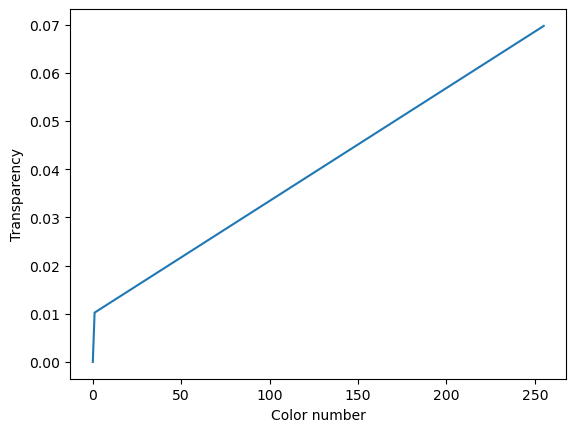

In [6]:
linear = lambda x, a, b: a*x + b

opacity = linear(np.arange(0, 256, 1), 0.06, 0.010*256)

# Filter out all data outside the data range provided
opacity[0] = 0

# Camera position, focal point and up vector
cpos = [(206.89799772877606, 178.51497042458308, 117.82139065452431),
 (4.056453101363986, 1.332431917323678, -12.99127038038598),
 (-0.3622863981685915, -0.24848270546213305, 0.8983345205368921)]

plt.plot(opacity/256);
plt.ylabel('Transparency');
plt.xlabel('Color number');

Dictionaries with plot settings

In [7]:
kwargs = {
    'window_size': [600, 1000],
    'position': cpos[0],
    'focal_point': cpos[1],
    'up': cpos[2],
    'background_color': '#9e9e9e',
    'transparent_background': False,
    'off_screen': False,
    'screenshot': False,
    'show_grid': False,
    'return_cpos': False,
    'notebook': True,
    'jupyter_backend': 'static',
    'anti_aliasing': True,
    'multi_samples': 4
}

rho_kwargs = {
    'spacing': delta,
    'origin': [-44.7, -44.7, 0],
    'cmap': 'RdBu_r',
    'log_scale': True,
    'clim': [-7, -2],
    'mapper': 'gpu',
    'scalar_bar_args': {'use_opacity': False},
    'opacity': opacity,
    'n_colors': 256,
    'shade': True,
    'mirror_z': True,
    'name': 'Density field',
    'volume_or_isosurface': 'volume',
    'isosurface_thresholds': [-3, -5, -6],
    'isosurface_opacity': 0.5
}

# field_line_kwargs = {
#     'spacing': delta,
#     'origin': [-44.7, -44.7, 0],
#     'source_center': [0, 0, 0],
#     'n_points': 40,
#     'radius': 0.25,
#     'source_radius': 5.9,
#     'cmap': 'twilight_shifted',
#     'log_scale': True,
#     'mirror_z': True,
#     'scalar_bar_args': {'n_labels': 3},
#     'name': 'Magnetic field'
# }

Creating the plot

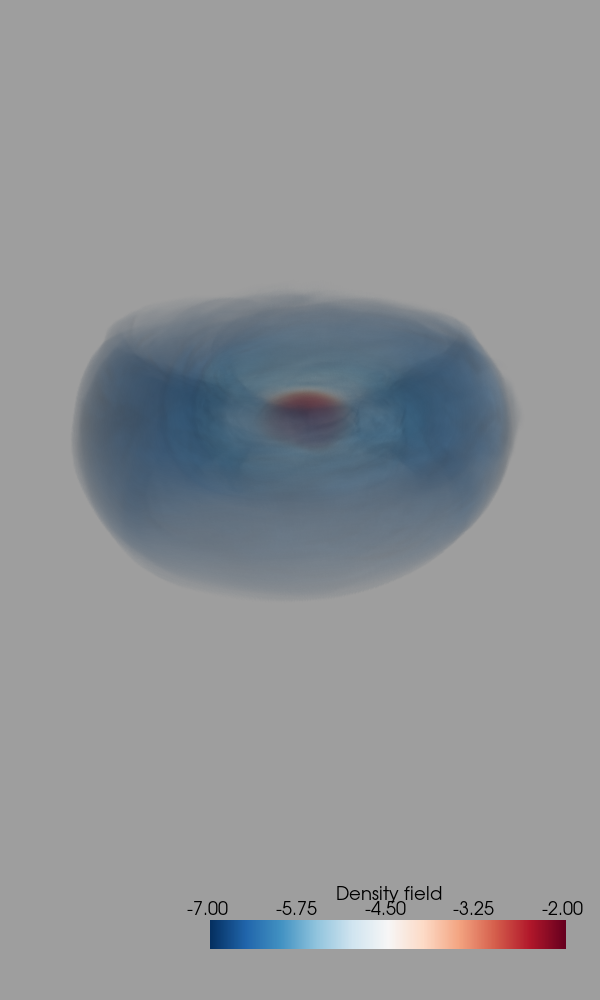

In [8]:
# Bvec_data = data_reader_B(0)
rho_data = data_reader_rho(0)
# kwargs['clim'] = [np.min(rho_data), np.max(rho_data)]

new_kwargs = kwargs.copy()

# streamlines, B_kwargs = field_dp.get_plot_object(Bvec_data, **field_line_kwargs)
volume, new_rho_kwargs = field_dp.get_plot_object(rho_data, **rho_kwargs)
field_plot.plotter([volume], [new_rho_kwargs], plotter_settings=new_kwargs)
# field_plot.plotter([streamlines, volume], [B_kwargs, rho_kwargs], plotter_settings=kwargs)

Creating the animation

In [9]:
# kwargs['notebook'] = False
# kwargs['window_size'] = [1200, 2000]

# field_plot.animator([data_reader_rho], [rho_kwargs], save_path=save_path, n_datasets=len(it_list), n_processes=4, **kwargs)
# field_plot.animator([data_reader_rho, data_reader_B], [rho_kwargs, field_line_kwargs], save_path=save_path, n_datasets=len(it_list), n_processes=4, **kwargs)